### 유튜브 인기동영상 데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/youtube.csv",index_col=0)
df.head()

,title,channelTitle,categoryId,view_count,likes,dislikes,comment_count,channelId,trending_date2
0,[신병] 물자창고,장삐쭈,23,1893473,38249,730,8595,UChbE5OZQ6dRHECsX0tEPEZQ,2021-01-01
1,RAIN(비) - 나로 바꾸자 Switch to me (duet with JYP) MV,RAIN's Official Channel,10,2600864,0,0,20129,UCxXgIeE5hxWxHG6dz9Scg2w,2021-01-01
2,2020년 제야의 종 온라인 타종행사 | 보신각 현장 행사는 진행하지 않습니다.,서울시 · Seoul,29,347049,3564,120,178,UCZUPZW5idAxYp-Asj__lVAA,2021-01-01
3,고기남자의 칠면조 파티,고기남자 MeatMan,26,528458,15372,280,3470,UCT3CumbFIJiW33uq0UI3zlg,2021-01-01
4,골목 3mc를 분노하게 만든 마음고생이 심했을 공릉 백반집 사장님의 푸념?! [예능...,스브스밥집,24,494904,3918,111,3142,UCdWgRSfttvDucq4ApcCg5Mw,2021-01-01


In [ ]:
# 인기동영상 제작횟수가 많은 채널 상위 10개

list(df.loc[df.channelId.isin(df.channelId.value_counts().head(10).index)].channelTitle.unique())

['장삐쭈',
 '총몇명',
 '파뿌리',
 '짤툰',
 '런닝맨 - 스브스 공식 채널',
 '엠뚜루마뚜루 : MBC 공식 종합 채널',
 'SPOTV',
 '채널 십오야',
 '이과장',
 'BANGTANTV']

In [ ]:
# dislikes수가 like 수보다 높은 동영상을 제작한 채널

list(df.query('dislikes > likes').channelTitle.unique())

['핫도그TV',
 'ASMR 애정TV',
 '하얀트리HayanTree',
 '양팡 YangPang',
 '철구형 (CHULTUBE)',
 '왜냐맨하우스',
 '(MUTUBE)와꾸대장봉준',
 '오메킴TV',
 '육지담',
 'MapleStory_KR',
 'ROAD FIGHTING CHAMPIONSHIP',
 '사나이 김기훈',
 '나혼자산다 STUDIO',
 'Gen.G esports']

In [ ]:
# channelId의 경우 고유값이므로 이를 통해 채널명을 한번이라도 바꾼 채널의 갯수

change = df[['channelTitle', 'channelId']].drop_duplicates().channelId.value_counts()
len(change[change > 1])

71

In [ ]:
# 일요일에 인기있었던 영상들중 가장많은 영상 종류(categoryId)는 무엇인가?

df['trending_date2'] = pd.to_datetime(df['trending_date2'])
df.loc[df['trending_date2'].dt.day_name() == 'Sunday'].categoryId.value_counts().index[0]

24

In [ ]:
# 각 요일별 인기 영상들의 categoryId는 각각 몇개 씩인지 하나의 데이터 프레임으로 표현하라

group = df.groupby(by = [df['trending_date2'].dt.day_name(), 'categoryId'], as_index = False).size()
group.pivot(index = 'categoryId', columns = 'trending_date2')

size                                                  
trending_date2 Friday Monday Saturday Sunday Thursday Tuesday Wednesday
categoryId                                                             
1                 243    263      255    274      246     257       234
2                 120    105      119     99      128     119       129
10                833    837      776    830      890     894       917
15                187    215      198    217      207     208       207
17                633    668      592    636      682     708       706
19                 90     92       87     91       92      89        85
20                283    298      296    289      282     285       291
22               1288   1373     1289   1337     1341    1375      1333
23                568    594      570    556      560     569       566
24               2976   3148     3066   3096     2954    3084      3090
25                444    453      422    437      470     452       468
26                369    378      364    363      375     394       385
27                183    205      183    199      194     194       212
28                171    160      173    167      166     161       165
29                 12     10       10      9       13      11        12

In [ ]:
# viewcount대비 댓글수가 가장 높은 영상을 확인하라 (view_count값이 0인 경우는 제외한다)

target = df.loc[df['view_count'] != 0]
t = target.copy()
t['ratio'] = (target['comment_count'] / target['view_count']).dropna()
t.sort_values(by = 'ratio', ascending = False).iloc[0].title

'60분 동안 댓글이 달리지 않으면, 영상이 삭제됩니다. (챌린지)'

In [ ]:
# viewcount대비 댓글수가 가장 낮은 영상을 확인하라 (view_counts, ratio값이 0인경우는 제외한다.)

ratio = (df['comment_count'] / df['view_count']).dropna().sort_values()
ratio[ratio!=0].index[0]
df.iloc[ratio[ratio!=0].index[0]].title

'Join the BTS #PermissiontoDance Challenge only on YouTube #Shorts'

In [ ]:
# like 대비 dislike의 수가 가장 적은 영상은 무엇인가? (like, dislike 값이 0인경우는 제외한다)

target = df.loc[(df.likes != 0) & (df.dislikes != 0)]
num = (target['dislikes'] / target['likes']).sort_values().index[0]
df.iloc[num].title

'[줌터뷰] *최초공개* 사부작즈🐰🐶의 비공식 이름은 아이라인즈? 꿀조합 티키타카 가득한 NCT 127 도영&정우의 줌터뷰'

In [ ]:
# 가장많은 트렌드 영상을 제작한 채널의 이름은 무엇인가?
df.loc[df.channelId == df.channelId.value_counts().index[0]].channelTitle.unique()

array(['짤툰'], dtype=object)

In [ ]:
# 20회(20일)이상 인기동영상 리스트에 포함된 동영상의 숫자는?
(df[['title', 'channelId']].value_counts()>=20).sum()

40

## 유튜브 공범컨텐츠 동영상 데이터

In [ ]:
channel =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/channelInfo.csv')
video =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/videoInfo.csv')

In [ ]:
display(channel.head())
display(video.head())

,channelid,subcnt,viewcnt,videocnt,ct,channelname
0,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,410238653,736,2021-09-30 03:01:03,꽈뚜룹
1,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,736,2021-09-30 09:01:03,꽈뚜룹
2,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,735,2021-09-30 15:01:03,꽈뚜룹
3,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,737,2021-09-30 21:01:03,꽈뚜룹
4,UCkQCwnkQfgSuPTTnw_Y7v7w,1320000,412531322,737,2021-10-01 03:01:04,꽈뚜룹


,videopk,viewcnt,likecnt,dislikecnt,favoritecnt,cmcnt,ct,videoname
0,c5JQp6xafqc,1667010,30474,706,0,6587,2021-10-10 15:20:03,공범 EP1
1,c5JQp6xafqc,1669089,30495,707,0,6589,2021-10-10 15:30:03,공범 EP1
2,c5JQp6xafqc,1674759,30522,711,0,6596,2021-10-10 15:40:02,공범 EP1
3,c5JQp6xafqc,1677026,30555,712,0,6604,2021-10-10 15:50:03,공범 EP1
4,c5JQp6xafqc,1681824,30585,713,0,6600,2021-10-10 16:00:03,공범 EP1


In [ ]:
# 각 데이터의 ‘ct’컬럼을 시간으로 인식할수 있게 datatype을 변경하고 video 데이터의 videoname의 각 value 마다 몇개의 데이터씩 가지고 있는지 확인하라

video['ct'] = pd.to_datetime(video['ct'])
video.videoname.value_counts()

 공범 EP1    3492
 공범 EP2    3204
 공범 EP3    2568
 공범 EP4    2280
 공범 EP5    1562
 공범 EP6    1274
 공범 EP7     555
 공범 EP8     266
Name: videoname, dtype: int64

In [ ]:
# 수집된 각 video의 가장 최신화 된 날짜의 viewcount값을 출력하라

video.sort_values(['videoname', 'ct']).drop_duplicates('videoname', keep = 'last')[['viewcnt', 'videoname', 'ct']].reset_index(drop = True)

,viewcnt,videoname,ct
0,3180532,공범 EP1,2021-11-01 15:30:03
1,2199328,공범 EP2,2021-11-01 15:30:03
2,1671294,공범 EP3,2021-11-01 15:30:03
3,1818493,공범 EP4,2021-11-01 15:30:03
4,1503435,공범 EP5,2021-11-01 15:30:04
5,1750222,공범 EP6,2021-11-01 15:30:04
6,1630200,공범 EP7,2021-11-01 15:30:05
7,1289088,공범 EP8,2021-11-01 15:30:05


In [ ]:
# Channel 데이터중 2021-10-03일 이후 각 채널의 처음 기록 됐던 구독자 수(subcnt)를 출력하라

channel['ct'] = pd.to_datetime(channel['ct'])
target = channel[channel.ct >= pd.to_datetime('2021-10-03')].sort_values(['ct', 'channelname']).drop_duplicates('channelname')
target[['channelname', 'subcnt']].reset_index(drop = True)

,channelname,subcnt
0,논리왕 전기,922000
1,야전삽짱재,257000
2,츄정ChuJeong,322000
3,김농밀의 농밀한 삶,7520
4,릴펄 Lilpearl,10100
5,와글와글 WagleWagle,55000
6,조나단,215000
7,형사!탐정되다,14900
8,Balming Tiger,54300
9,곽토리 kwak tori,471000


In [ ]:
# 각채널의 2021-10-03 03:00:00 ~ 2021-11-01 15:00:00 까지 구독자수 (subcnt) 의 증가량을 구하여라

end = channel.loc[channel.ct.dt.strftime('%Y-%m-%d %H') =='2021-11-01 15']
start = channel.loc[channel.ct.dt.strftime('%Y-%m-%d %H') =='2021-10-03 03']

end_df = end[['channelname','subcnt']].reset_index(drop=True)
start_df = start[['channelname','subcnt']].reset_index(drop=True)

end_df.columns = ['channelname','end_sub']
start_df.columns = ['channelname','start_sub']


tt = pd.merge(start_df,end_df)
tt['del'] = tt['end_sub'] - tt['start_sub']
tt[['channelname','del']]

,channelname,del
0,꽈뚜룹,70000
1,야전삽짱재,11000
2,츄정ChuJeong,1000
3,논리왕 전기,-11000
4,와글와글 WagleWagle,0
5,조나단,12000
6,형사!탐정되다,10300
7,김농밀의 농밀한 삶,1540
8,릴펄 Lilpearl,11000
9,곽토리 kwak tori,-2000


In [ ]:
# 각 비디오는 10분 간격으로 구독자수, 좋아요, 싫어요수, 댓글수가 수집된것으로 알려졌다. 공범 EP1의 비디오정보 데이터중 수집간격이 5분 이하, 20분이상인 데이터 구간( 해당 시점 전,후) 의 시각을 모두 출력하라

import datetime

ep_one = video.loc[video.videoname.str.contains('1')].sort_values('ct').reset_index(drop=True)

ep_one[
        (ep_one.ct.diff(1) >=datetime.timedelta(minutes=20)) | \
        (ep_one.ct.diff(1) <=datetime.timedelta(minutes=5))

      ]

ep_one[ep_one.index.isin([720,721,722,723,1635,1636,1637])]

,videopk,viewcnt,likecnt,dislikecnt,favoritecnt,cmcnt,ct,videoname
720,c5JQp6xafqc,2153676,34104,830,0,7120,2021-10-12 19:20:03,공범 EP1
721,c5JQp6xafqc,2228250,34559,849,0,7191,2021-10-13 09:41:37,공범 EP1
722,c5JQp6xafqc,2228250,34559,849,0,7191,2021-10-13 09:41:37,공범 EP1
723,c5JQp6xafqc,2228669,34566,849,0,7194,2021-10-13 09:50:03,공범 EP1
1635,c5JQp6xafqc,2706691,37893,987,0,7410,2021-10-19 17:50:02,공범 EP1
1636,c5JQp6xafqc,2707933,37901,988,0,7410,2021-10-19 18:20:03,공범 EP1
1637,c5JQp6xafqc,2708448,37903,988,0,7410,2021-10-19 18:30:03,공범 EP1


In [ ]:
#각 에피소드의 시작날짜(년-월-일)를 에피소드 이름과 묶어 데이터 프레임으로 만들고 출력하라

start_date = video.sort_values(['ct','videoname']).drop_duplicates('videoname')[['ct','videoname']]
start_date['date'] = start_date.ct.dt.date
start_date[['date','videoname']]

,date,videoname
10,2021-10-07,공범 EP1
3496,2021-10-09,공범 EP2
6696,2021-10-14,공범 EP3
9264,2021-10-16,공범 EP4
11544,2021-10-21,공범 EP5
13661,2021-10-23,공범 EP6
13106,2021-10-28,공범 EP7
14935,2021-10-30,공범 EP8


In [ ]:
# “공범” 컨텐츠의 경우 19:00시에 공개 되는것으로 알려져있다. 공개된 날의 21시의 viewcnt, ct, videoname 으로 구성된 데이터 프레임을 viewcnt를 내림차순으로 정렬하여 출력하라

video['time']= video.ct.dt.hour

answer = video.loc[video['time'] ==21] \
            .sort_values(['videoname','ct'])\
            .drop_duplicates('videoname') \
            .sort_values('viewcnt',ascending=False)[['videoname','viewcnt','ct']]\
            .reset_index(drop=True)
answer

,videoname,viewcnt,ct
0,공범 EP8,264029,2021-10-30 21:00:08
1,공범 EP7,252032,2021-10-28 21:00:04
2,공범 EP4,217674,2021-10-16 21:00:04
3,공범 EP6,213899,2021-10-23 21:00:06
4,공범 EP5,201179,2021-10-21 21:00:04
5,공범 EP2,148144,2021-10-09 21:00:03
6,공범 EP3,147183,2021-10-14 21:00:04
7,공범 EP1,117340,2021-10-07 21:00:03


In [ ]:
# video 정보의 가장 최근 데이터들에서 각 에피소드의 싫어요/좋아요 비율을 ratio 컬럼으로 만들고 videoname, ratio로 구성된 데이터 프레임을 ratio를 오름차순으로 정렬하라

target = video.sort_values('ct').drop_duplicates('videoname', keep = 'last')
target['ratio'] = target['dislikecnt'] / target['likecnt']
target.sort_values('ratio')[['videoname', 'ratio']].reset_index(drop = True)

,videoname,ratio
0,공범 EP7,0.013636
1,공범 EP6,0.015881
2,공범 EP4,0.017971
3,공범 EP5,0.021128
4,공범 EP3,0.022360
5,공범 EP1,0.027118
6,공범 EP2,0.029844
7,공범 EP8,0.141357


In [ ]:
# 2021-11-01 00:00:00 ~ 15:00:00까지 각 에피소드별 viewcnt의 증가량을 데이터 프레임으로 만드시오

start = pd.to_datetime("2021-11-01 00:00:00")
end = pd.to_datetime("2021-11-01 15:00:00")

target = video.loc[(video["ct"] >= start) & (video['ct'] <= end)].reset_index(drop=True)

def check(x):
    result = max(x) - min(x)
    return result

target[['videoname','viewcnt']].groupby("videoname").agg(check)

,viewcnt
videoname,
공범 EP1,13298
공범 EP2,10300
공범 EP3,9927
공범 EP4,9824
공범 EP5,10824
공범 EP6,14141
공범 EP7,26949
공범 EP8,89147


In [ ]:
# video 데이터 중에서 중복되는 데이터가 존재한다. 중복되는 각 데이터의 시간대와 videoname 을 구하여라

answer = video[video.index.isin(set(video.index) -  set(video.drop_duplicates().index))]
result = answer[['videoname','ct']]
result

,videoname,ct
722,공범 EP1,2021-10-13 09:41:37
3927,공범 EP2,2021-10-13 09:41:37


## 월드컵 출전선수 골기록 데이터

In [ ]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/worldcup/worldcupgoals.csv')
df.head()

,Player,Goals,Years,Country
0,Miroslav Klose,16,2002-2006-2010-2014,Germany
1,Ronaldo,15,1998-2002-2006,Brazil
2,Gerd Muller,14,1970-1974,Germany
3,Just Fontaine,13,1958,France
4,Pele,12,1958-1962-1966-1970,Brazil


In [ ]:
# 주어진 전체 기간의 각 나라별 골득점수 상위 5개 국가와 그 득점수를 데이터프레임형태로 출력하라

df.groupby('Country').sum('Goals').sort_values('Goals', ascending = False).head(5)

,Goals
Country,
Brazil,228
Germany,226
Argentina,135
Italy,123
France,115


In [ ]:
# 주어진 전체기간동안 골득점을 한 선수가 가장 많은 나라 상위 5개 국가와 그 선수 숫자를 데이터 프레임 형식으로 출력하라

df.groupby('Country').size().sort_values(ascending = False).head(5)

Country
Brazil       81
Germany      78
Italy        60
Argentina    59
France       58
dtype: int64

In [ ]:
# Years 컬럼은 년도 -년도 형식으로 구성되어있고, 각 년도는 4자리 숫자이다. 년도 표기가 4자리 숫자로 안된 케이스가 존재한다. 해당 건은 몇건인지 출력하라

df['yearLst'] = df.Years.str.split('-')

def checkFour(x):
    for value in x:
        if len(str(value)) != 4:
            return False

    return True

df['check'] = df['yearLst'].apply(checkFour)

len(df[df.check ==False])

45

## 서울시 따릉이 이용정보 데이터

In [ ]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/bicycle/seoul_bi.csv')
df.head()

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-06-01,0,3541,정기권,F,~10대,1,0.00,0.00,0.00,8
1,2021-06-01,0,765,정기권,F,~10대,1,27.21,0.35,1526.81,19
2,2021-06-01,0,2637,정기권,F,~10대,1,41.40,0.37,1608.56,18
3,2021-06-01,0,2919,정기권,F,~10대,1,0.00,0.00,0.00,75
4,2021-06-01,0,549,정기권,F,~10대,1,13.04,0.17,731.55,6


In [ ]:
# 대여일자별 데이터의 수를 데이터프레임으로 출력하고, 가장 많은 데이터가 있는 날짜를 출력하라
import numpy as np

result = pd.DataFrame(df['대여일자'].value_counts().sort_index())
print(result)
print(result.iloc[np.argmax(result)])

             대여일자
2021-06-01  48081
2021-06-02  56100
2021-06-03  18985
2021-06-04  56788
2021-06-05  52730
2021-06-06  47787
2021-06-07  52623
2021-06-08  55623
2021-06-09  54507
2021-06-10  36992
2021-06-11  52089
2021-06-12  48569
2021-06-13  43131
2021-06-14  54945
대여일자    56788
Name: 2021-06-04, dtype: int64


In [ ]:
# 각 일자의 요일을 표기하고 (‘Monday’ ~’Sunday’) ‘day_name’컬럼을 추가하고 이를 이용하여 각 요일별 이용 횟수의 총합을 데이터 프레임으로 출력하라
from datetime import datetime

df['대여일자'] = pd.to_datetime(df['대여일자'])
df['day_name'] = df['대여일자'].dt.day_name()
df.day_name.value_counts().to_frame()

,day_name
Wednesday,110607
Friday,108877
Monday,107568
Tuesday,103704
Saturday,101299
Sunday,90918
Thursday,55977


In [ ]:
# 각 요일별 가장 많이 이용한 대여소의 이용횟수와 대여소 번호를 데이터 프레임으로 출력하라

result = df.groupby(['day_name', '대여소번호']).size().to_frame('size').sort_values(['day_name', 'size'], ascending = False).reset_index()
result.drop_duplicates('day_name', keep = 'first').reset_index(drop = True)

,day_name,대여소번호,size
0,Wednesday,502,282
1,Tuesday,502,267
2,Thursday,2715,137
3,Sunday,502,372
4,Saturday,502,378
5,Monday,502,242
6,Friday,502,277


~10대    0.312525
20대     0.239913
30대     0.166702
40대     0.110585
50대     0.065414
70대~    0.048962
60대     0.042462
Name: 연령대코드, dtype: float64
max ratio age  ~10대


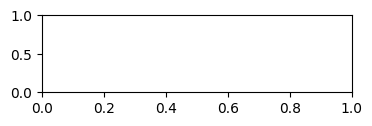

In [ ]:
# 나이대별 대여구분 코드의 (일일권/전체횟수) 비율을 구한 후 가장 높은 비율을 가지는 나이대를 확인하라. 일일권의 경우 일일권 과 일일권(비회원)을 모두 포함하라

daily = df[df.대여구분코드.isin(['일일권','일일권(비회원)'])].연령대코드.value_counts().sort_index()
total = df.연령대코드.value_counts().sort_index()

ratio = (daily /total).sort_values(ascending=False)
print(ratio)
print('max ratio age ',ratio.index[0])

In [ ]:
# 연령대별 평균 이동거리를 구하여라

df[['연령대코드', '이동거리']].groupby(['연령대코드']).mean()

,이동거리
연령대코드,
20대,3211.890552
30대,3341.443859
40대,3514.857416
50대,3593.668100
60대,3538.145737
70대~,3085.039641
~10대,2634.426279


In [ ]:
# 6월 7일 ~10대의 “이용건수”의 중앙값은?

df['대여일자'] = pd.to_datetime(df['대여일자'])
df[(df.연령대코드 == '~10대') & (df.대여일자 == pd.to_datetime('2021-06-07'))].이용건수.median()

1.0

In [ ]:
# 이동거리의 평균 이상의 이동거리 값을 가지는 데이터를 추출하여 추출데이터의 이동거리의 표본표준편차 값을 구하여라

df[df.이동거리 >= df.이동거리.mean()].이동거리.std()

5092.139707505356

In [ ]:
# 남성(‘M’ or ‘m’)과 여성(‘F’ or ‘f’)의 이동거리값의 평균값을 구하여라

df['sex'] = df['성별'].map(lambda x: '남' if x in ['M', 'm'] else '여')
df[['sex', '이동거리']].groupby('sex').mean()

,이동거리
sex,
남,3209.110871
여,3468.575025
